In [36]:
# Magic Function

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data = 'data/city_data.csv'
ride_data = 'data/ride_data.csv'

# Read the City and Ride Data

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

#duplicate  city so drop dups

city_df = city_df.drop_duplicates('city')
city_df.head()

# Combine the data into a single dataset

pyber_df = pd.merge(ride_df, city_df, how='left', on=['city'])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [37]:
#Find the average fare per city

average = pyber_df.groupby('city')['fare'].mean()

#Find the total rides per city

total = pyber_df.groupby('city')['ride_id'].count()

#Find the total number of drivers per city

drivers = pyber_df.groupby('city')['driver_count'].mean()

#city type

city_type = city_df.set_index('city')['type']
city_type.value_counts()
city_type = pd.DataFrame({'Average Fare per City':average,
                 'Number of Rides': total,
                 'Number of Drivers': drivers,
                 'City Type': city_type})
city_type.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

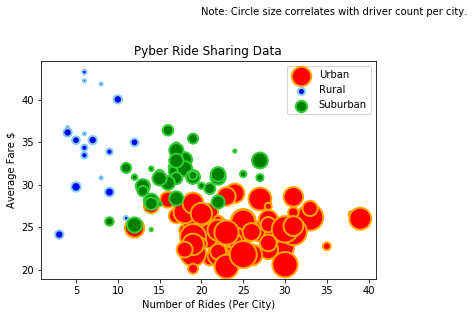

In [45]:
# Obtain the x and y coordinates for each of the three city types

urban = city_type.loc[city_type['City Type']== 'Urban']
rural = city_type.loc[city_type['City Type']== 'Rural']
suburban = city_type.loc[city_type['City Type']== 'Suburban']

# Build the scatter plots for each city types

plt.scatter(urban['Number of Rides'], urban['Average Fare per City'],
            color = 'red', edgecolors='orange', s = urban['Number of Drivers']*10, 
            label = 'Urban', alpha = 1, linewidth = 2)

plt.scatter(rural['Number of Rides'], rural['Average Fare per City'], 
            color = 'blue', edgecolors = 'skyblue', s = rural['Number of Drivers']*10, 
            label = 'Rural', alpha = 1, linewidth = 2)

plt.scatter(suburban['Number of Rides'], suburban['Average Fare per City'], 
            color = 'green', edgecolors ='limegreen', s = suburban['Number of Drivers']*10,
            label = 'Suburban', alpha = 1, linewidth = 2)

# Create a legend
plt.legend(loc= 'upper right')

#Add title, x axis label and y axis label.
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare $')
plt.text(20, 50,'Note: Circle size correlates with driver count per city.')

#save
plt.savefig('Pyber_Ride.png')

In [29]:
# Show plot
plt.show()

## Total Fares by City Type

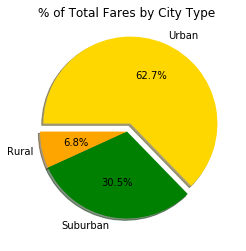

In [49]:
total_fare=  pyber_df.groupby(['type']).sum()['fare'] / pyber_df['fare'].sum()

#build pie chart
plt.pie(total_fare,
        labels =['Rural','Suburban','Urban'],
        colors =['orange','green','gold'],
        explode =[0,0,0.1],
          autopct='%1.1f%%',
        shadow =True, startangle =180)

plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Total_fare.png')

In [31]:
# Show Figure
plt.show()

## Total Rides by City Type

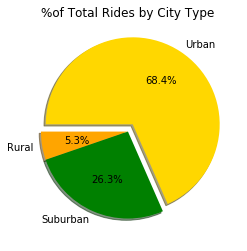

In [47]:
# Calculate Ride Percents

ride_type =  pyber_df.groupby(['type']).count()['ride_id'] / pyber_df['ride_id'].count()

# Build Pie Chart
plt.pie(ride_type,
        labels =['Rural','Suburban','Urban'],
        colors =['orange','green','gold'],
        explode =[0,0,0.1],
          autopct='%1.1f%%',
        shadow =True, startangle =180)
plt.title('%of Total Rides by City Type')


# Save Figure
plt.savefig('ride_type.png')

In [33]:
# Show Figure
plt.show()

## Total Drivers by City Type

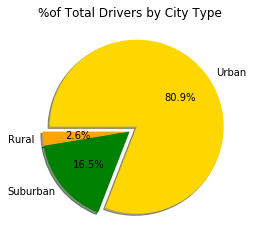

In [46]:
# Calculate Driver Percents
city1_df = city_df.drop_duplicates(['city'])
c2 = city1_df.groupby(['type'])['driver_count'].sum()

# Build Pie Chart

plt.pie(c2,
       labels=['Rural','Suburban','Urban'],
      colors =['orange','green','gold'],
      explode =[0,0,0.1],
       autopct='%1.1f%%',
      shadow =True, startangle =180)

plt.title('%of Total Drivers by City Type')

# Save Figure
plt.savefig('driver_type.png')

In [35]:
# Show Figure
plt.show()